In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import datetime

In [2]:
def ct_hospitalization(x):
    '''
    Level of community transmission for hospitalization rate
    '''
    if x>=30:
        rv = 4
    elif x>=10:
        rv = 3
    elif x>=5:
        rv = 2
    else:
        rv = 1
    return rv

In [3]:
def ct_mortality(x):
    '''
    Level of community transmission for mortality
    '''
    if x>=5:
        rv = 4
    elif x>=2:
        rv = 3
    elif x>=1:
        rv = 2
    else:
        rv = 1
    return rv

In [4]:
def ct_cases(x):
    '''
    Level of community transmission for case incidence
    '''
    if x>=150:
        rv = 4
    elif x>=50:
        rv = 3
    elif x>=20:
        rv = 2
    else:
        rv = 1
    return rv

In [5]:
def ct_testing(x):
    '''
    Level of community transmission for testing
    '''
    if x>=0.2:
        rv = 4
    elif x>=0.05:
        rv = 3
    elif x>=0.02:
        rv = 2
    else:
        rv = 1
    return rv

In [6]:
def ctr_cc_capacity(x):
    '''
    Capacity to respond according to clinical care capacity
    '''
    if x>=0.9:
        rv = 'Limitada'
    elif x>=0.75:
        rv = 'Moderada'
    else:
        rv = 'Adecuada'
    return rv

In [7]:
def ctr_cc_performance(data):
    '''
    Capacity to respond according to clinical care performance
    '''
    if data[-14]<=(data[-28]*0.995) and data[-1]<=(data[-14]*0.995):
        rv = ('Adecuada')
    elif data[-14]>=(data[-28]*1.005) or data[-1]>=(data[-14]*1.005):
        rv = ('Limitada')
    else:
        rv = ('Moderada')
    return rv

In [8]:
def ctr_response_capacity(x):
    '''
    Capacity to respond according to public health response capacity
    '''
    rv = 'Moderada'
    if x>=2:
        rv = 'Adecuada'
    elif x<1:
        rv = 'Limitada'
    return rv

In [9]:
hoy=datetime.datetime(2021,6,16)
#hoy = hoy.replace(hour=0, minute=0, second=0, microsecond=0)
#hoy= hoy - datetime.timedelta(days=1)

In [10]:
razones =  pd.read_csv('ExcesoMuertes_210315.csv')
razones['ESTADO'] = [x.upper() for x in list(razones['ESTADO'])]

In [11]:
poblacion = pd.read_excel('../CIC19/datos/generales/poblacion.xlsx', engine='openpyxl')
pobyrazon = poblacion.set_index('ENTIDAD').join(razones.set_index('ESTADO')).reset_index()
edos = list(poblacion['ENTIDAD'].values)
pob_nac = poblacion.iloc[0,-1]
poblacion = poblacion.iloc[1:,:].set_index('ENTIDAD').reset_index()

In [12]:
pobyrazon

,ENTIDAD,POBLACION,ASOCIADA COVID19,EXCESO DEFUNCIONES,CONFIRMADA COVID19,razon_covid,razon_exceso
0,NACIONAL,119530753,329965,458026,209949,1.571644,2.181606
1,AGUASCALIENTES,1312544,3539,3578,2253,1.570794,1.588282
2,BAJA CALIFORNIA,3315766,10921,14861,7942,1.375094,1.871166
3,BAJA CALIFORNIA SUR,712029,1609,1492,1301,1.236741,1.146810
4,CAMPECHE,899931,1767,2139,1156,1.528547,1.850346
5,COAHUILA,2954915,9514,11087,6151,1.546740,1.802471
6,COLIMA,711235,1500,1617,1149,1.305483,1.407311
7,CHIAPAS,5217908,2833,2266,1507,1.879894,1.503915
8,CHIHUAHUA,3556574,8323,8575,6276,1.326163,1.366284
9,CIUDAD DE MÉXICO,8918653,71221,90523,31479,2.262492,2.875663


In [13]:
cols = ['ENTIDAD_UM','ENTIDAD_NAC','ENTIDAD_RES','TIPO_PACIENTE','FECHA_INGRESO',
        'FECHA_SINTOMAS','FECHA_DEF','CLASIFICACION_FINAL', 'RESULTADO_LAB','RESULTADO_ANTIGENO']
zf = zipfile.ZipFile('datos_abiertos_covid19_210616.zip')
base = pd.read_csv(zf.open('210616COVID19MEXICO.csv'), encoding='latin1', usecols=cols, low_memory=True)
zf.close()

In [14]:
base_covid = base[base['CLASIFICACION_FINAL'].isin([1,2,3])]
base_covid

,ENTIDAD_UM,ENTIDAD_NAC,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL
0,9,9,9,1,2020-10-16,2020-10-16,9999-99-99,97,97,1
1,23,23,23,2,2020-07-20,2020-07-17,2020-07-21,97,97,2
8,12,12,12,1,2020-08-19,2020-08-17,9999-99-99,1,97,3
14,22,15,22,1,2020-08-31,2020-08-26,9999-99-99,1,97,3
15,9,9,9,1,2020-09-08,2020-09-03,9999-99-99,1,97,3
...,...,...,...,...,...,...,...,...,...,...
7270348,31,31,31,1,2021-06-10,2021-06-08,9999-99-99,97,1,3
7270350,4,4,4,1,2021-06-09,2021-06-08,9999-99-99,97,97,1
7270351,9,30,9,1,2021-06-10,2021-06-06,9999-99-99,97,2,1
7270355,9,9,9,1,2021-06-10,2021-06-10,9999-99-99,97,2,1


In [15]:
base_covid['FECHA_INGRESO'] = pd.to_datetime(base_covid['FECHA_INGRESO'])
base_covid['FECHA_SINTOMAS'] = pd.to_datetime(base_covid['FECHA_SINTOMAS'])


/home/emilio/anaconda3/envs/continuum-test/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/emilio/anaconda3/envs/continuum-test/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
base_covid['FECHA_DEF'] = base_covid['FECHA_DEF'].replace({'9999-99-99':np.nan})
base_covid['FECHA_DEF'] = pd.to_datetime(base_covid['FECHA_DEF'])
base_covid

/home/emilio/anaconda3/envs/continuum-test/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/emilio/anaconda3/envs/continuum-test/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ENTIDAD_UM,ENTIDAD_NAC,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL
0,9,9,9,1,2020-10-16,2020-10-16,NaT,97,97,1
1,23,23,23,2,2020-07-20,2020-07-17,2020-07-21,97,97,2
8,12,12,12,1,2020-08-19,2020-08-17,NaT,1,97,3
14,22,15,22,1,2020-08-31,2020-08-26,NaT,1,97,3
15,9,9,9,1,2020-09-08,2020-09-03,NaT,1,97,3
...,...,...,...,...,...,...,...,...,...,...
7270348,31,31,31,1,2021-06-10,2021-06-08,NaT,97,1,3
7270350,4,4,4,1,2021-06-09,2021-06-08,NaT,97,97,1
7270351,9,30,9,1,2021-06-10,2021-06-06,NaT,97,2,1
7270355,9,9,9,1,2021-06-10,2021-06-10,NaT,97,2,1


# CASE INCIDENCE

In [17]:
#cons = base_covid.pivot_table(index='FECHA_SINTOMAS',aggfunc='size')
#cons = pd.DataFrame(cons) #lo anterior a dataframe
#idx = pd.date_range(cons.index[0],hoy) #creamos un indice de fechas desde el primer registro hasta hoy
#cons = cons.reindex(idx, fill_value=0)
#cons = cons*100000/pob_nac
#cons_sum = cons.rolling(7).sum() * pobyrazon.loc[0,'razon_covid']
#case_incidence_nac = (cons_sum.iloc[-1,-1] + cons_sum.iloc[-8,-1])/2
#case_incidence = [case_incidence_nac]
#print(case_incidence)
#ct_cases(case_incidence[0])

In [18]:
#for i in range(len(poblacion)):
#    cons_i = base_covid[base_covid['ENTIDAD_UM']==i+1].pivot_table(index='FECHA_SINTOMAS',aggfunc='size')
#    cons_i = pd.DataFrame(cons_i) #lo anterior a dataframe
#    idx = pd.date_range(cons_i.index[0],hoy) #creamos un indice de fechas desde el primer registro hasta hoy
#    cons_i = cons_i.reindex(idx, fill_value=0)
#    cons_i = cons_i*100000/poblacion['POBLACION'][i]
#    cons_sum_i = cons_i.rolling(7).sum() * pobyrazon.loc[i+1,'razon_covid']
#    case_incidence_i = (cons_sum_i.iloc[-1,-1] + cons_sum_i.iloc[-8,-1])/2
#    case_incidence.append(case_incidence_i)
#
#len(case_incidence)

In [19]:
#ct_cases_states = [ct_cases(x) for x in case_incidence]
#ct_cases_states

# MORTALITY

In [20]:
base_def = base_covid[base_covid['FECHA_DEF'].notna()]

In [21]:
defs = base_def.pivot_table(index='FECHA_DEF',aggfunc='size')
defs = pd.DataFrame(defs) #lo anterior a dataframe
idx = pd.date_range(defs.index[0],hoy) #creamos un indice de fechas desde el primer registro hasta hoy
defs = defs.reindex(idx, fill_value=0)
defs = defs*100000/pob_nac
defs_sum = defs.rolling(7).sum() * pobyrazon.loc[0,'razon_exceso']
mortality_nac = (defs_sum.iloc[-1,-1] + defs_sum.iloc[-8,-1])/2
mortality = [mortality_nac]
print(mortality_nac)
ct_mortality(mortality[0])

0.81218820234479


1

In [22]:
for i in range(len(poblacion)):
    defs = base_def[base_def['ENTIDAD_UM']==i+1].pivot_table(index='FECHA_DEF',aggfunc='size')
    defs = pd.DataFrame(defs) #lo anterior a dataframe
    idx = pd.date_range(defs.index[0],hoy) #creamos un indice de fechas desde el primer registro hasta hoy
    defs = defs.reindex(idx, fill_value=0)
    defs = defs*100000/poblacion['POBLACION'][i]
    defs_sum = defs.rolling(7).sum() * pobyrazon.loc[i+1,'razon_exceso']
    mortality_i = (defs_sum.iloc[-1,-1] + defs_sum.iloc[-8,-1])/2
    mortality.append(mortality_i)

mortality

[0.81218820234479,
 0.9680634189967742,
 0.536107691405954,
 1.3690293852290938,
 1.953292774360691,
 0.24399634411190602,
 0.890408679595883,
 0.01441109217562688,
 0.8067305616940926,
 1.273608178835982,
 0.38724371015838854,
 0.1268605643519871,
 0.3898804213246668,
 0.5724775360271077,
 0.34563782484831074,
 0.39430182137097547,
 0.7733162522564794,
 1.1130562621712041,
 0.4233521019431823,
 0.6361521630229348,
 0.1512139074454963,
 1.1127162889030073,
 0.5976325559586064,
 3.9161266851077925,
 0.17651504187589478,
 0.7138491023841038,
 0.8573253666653886,
 1.1070890318221067,
 1.4703050196835232,
 0.5013479507486749,
 0.32900064748269126,
 2.418304810809002,
 0.4606612570821886]

In [23]:
ct_mortality_states = [ct_mortality(x) for x in mortality]
ct_mortality_states

[1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 1]

# NEW CASE INCIDENCE

In [24]:
case_incidence = [m/0.015 for m in mortality]
case_incidence

[54.14588015631933,
 64.53756126645162,
 35.74051276039694,
 91.26862568193958,
 130.21951829071273,
 16.266422940793735,
 59.36057863972553,
 0.9607394783751253,
 53.782037446272845,
 84.90721192239882,
 25.81624734389257,
 8.457370956799139,
 25.992028088311123,
 38.16516906847385,
 23.04252165655405,
 26.286788091398364,
 51.55441681709863,
 74.20375081141361,
 28.22347346287882,
 42.410144201528986,
 10.080927163033087,
 74.18108592686715,
 39.84217039724043,
 261.0751123405195,
 11.767669458392986,
 47.58994015894026,
 57.15502444435924,
 73.80593545480711,
 98.02033464556821,
 33.423196716578325,
 21.933376498846084,
 161.22032072060014,
 30.710750472145907]

In [25]:
ct_cases_states = [ct_cases(x) for x in case_incidence]
ct_cases_states

[3,
 3,
 2,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 1,
 3,
 2,
 4,
 1,
 2,
 3,
 3,
 3,
 2,
 2,
 4,
 2]

# HOSPITALIZATION RATE

In [26]:
base_hospi = base_covid[base_covid['TIPO_PACIENTE']==2]

In [27]:
hospi = base_hospi.pivot_table(index='FECHA_INGRESO',aggfunc='size')
hospi = pd.DataFrame(hospi) #lo anterior a dataframe
idx = pd.date_range(hospi.index[0],hoy) #creamos un indice de fechas desde el primer registro hasta hoy
hospi = hospi.reindex(idx, fill_value=0)
hospi = hospi*100000/pob_nac
hospi_sum = hospi.rolling(7).sum()
hospitalization_nac = (hospi_sum.iloc[-1,-1] + hospi_sum.iloc[-8,-1])/2
hospitalization = [hospitalization_nac]
print(hospitalization)
ct_hospitalization(hospitalization[0])

[1.2160050560377473]


1

In [28]:
for i in range(len(poblacion)):
    hospi = base_hospi[base_hospi['ENTIDAD_UM']==i+1].pivot_table(index='FECHA_INGRESO',aggfunc='size')
    hospi = pd.DataFrame(hospi) #lo anterior a dataframe
    idx = pd.date_range(hospi.index[0],hoy) #creamos un indice de fechas desde el primer registro hasta hoy
    hospi = hospi.reindex(idx, fill_value=0)
    hospi = hospi*100000/poblacion['POBLACION'][i]
    hospi_sum = hospi.rolling(7).sum()
    hospitalization_i = (hospi_sum.iloc[-1,-1] + hospi_sum.iloc[-8,-1])/2
    hospitalization.append(hospitalization_i)

hospitalization

[1.2160050560377473,
 0.7618792208108924,
 0.9650861972768869,
 7.794626342466383,
 3.2224692782002258,
 0.5583916965462615,
 1.4763052999360262,
 0.23955960894672848,
 1.1949702157188313,
 1.642624732680996,
 0.5413864279551386,
 0.3160406698217058,
 0.7358662036747428,
 1.1370160291272071,
 0.5417580750634413,
 0.4077192874944884,
 0.4362553498538855,
 0.7616302248489984,
 1.3123915160238673,
 1.5138185261697097,
 0.4914451991978648,
 0.972623406863125,
 0.6132344832052236,
 7.658691416005466,
 0.607104223237747,
 2.1575547622795916,
 2.12256124729416,
 2.400562441342765,
 2.818376278220804,
 0.47138422764086474,
 0.9060086865894124,
 8.940598662486442,
 0.4115984648010537]

In [29]:
ct_hospitalization_states = [ct_hospitalization(x) for x in hospitalization]
ct_hospitalization_states

[1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1]

# TESTING

In [30]:
base_pruebas = base[base['RESULTADO_LAB']!=97]
base_pruebas['FECHA_INGRESO'] = pd.to_datetime(base_pruebas['FECHA_INGRESO'])

/home/emilio/anaconda3/envs/continuum-test/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
pruebas_sent = base_pruebas.pivot_table(index='FECHA_INGRESO',aggfunc='size')
idx = pd.date_range(pruebas_sent.index[0],hoy)
pruebas_sent = pruebas_sent.reindex(idx, fill_value=0)
pruebas_pos = base_pruebas[base_pruebas['RESULTADO_LAB']==1].pivot_table(index='FECHA_INGRESO',aggfunc='size')
pruebas_pos = pruebas_pos.reindex(idx, fill_value=0)
pruebas_rate = pruebas_pos/pruebas_sent
pruebas_rate = pruebas_rate.rolling(14).mean()
testing_nac = pruebas_rate.iloc[-1]
testing = [testing_nac]
print(testing)
ct_testing(testing[0])

[0.18844273684203844]


3

In [32]:
for i in range(len(poblacion)):
    base_i = base_pruebas[base_pruebas['ENTIDAD_UM']==i+1]
    pruebas_sent = base_i.pivot_table(index='FECHA_INGRESO',aggfunc='size')
    idx = pd.date_range(pruebas_sent.index[0],hoy)
    pruebas_sent = pruebas_sent.reindex(idx, fill_value=0)
    pruebas_pos = base_i[base_i['RESULTADO_LAB']==1].pivot_table(index='FECHA_INGRESO',aggfunc='size')
    pruebas_pos = pruebas_pos.reindex(idx, fill_value=0)
    pruebas_rate = pruebas_pos/pruebas_sent
    pruebas_rate = pruebas_rate.interpolate()
    #print(pruebas_pos[-1],pruebas_sent[-1],pruebas_rate[-1])
    pruebas_rate = pruebas_rate.rolling(14).mean()
    testing_i = pruebas_rate.iloc[-1]
    testing.append(testing_i)
    
testing

[0.18844273684203844,
 0.07722595079676052,
 0.14118685621757818,
 0.44336268767857173,
 0.23134358317246834,
 0.10842640600552156,
 0.2461309523809526,
 0.04183560800102142,
 0.1705505416467767,
 0.09506436844612674,
 0.1926528319538768,
 0.11914603491131805,
 0.22207464013273318,
 0.22760051053709685,
 0.16507112301204566,
 0.12712410889299716,
 0.2184635800707234,
 0.08240885424028663,
 0.2170057125414267,
 0.21692485647184823,
 0.0828197585141738,
 0.12455676282171167,
 0.11083640246151784,
 0.3774055845174332,
 0.10602895789349144,
 0.3574779235213801,
 0.2429355433777784,
 0.22960640789965242,
 0.28898641912778533,
 0.08092165800975902,
 0.2555739139720648,
 0.3716543016401047,
 0.14099899057709223]

In [33]:
ct_testing_states = [ct_testing(x) for x in testing]
ct_testing_states

[3,
 3,
 3,
 4,
 4,
 3,
 4,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3]

# CLINICAL CARE PERFORMANCE

['Moderada']

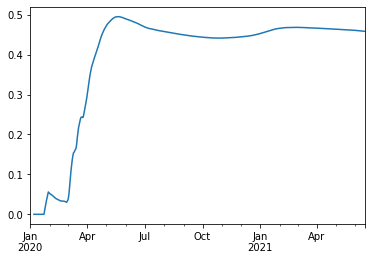

In [34]:
hospi_tot = base_hospi.pivot_table(index='FECHA_INGRESO',aggfunc='size')
idx = pd.date_range(hospi_tot.index[0],hoy)
hospi_tot = hospi_tot.reindex(idx, fill_value=0).cumsum()
hospi_def = base_hospi[base_hospi['FECHA_DEF'].notna()].pivot_table(index='FECHA_INGRESO',aggfunc='size')
hospi_def = hospi_def.reindex(idx, fill_value=0).cumsum()
cc_performance = hospi_def/hospi_tot
cc_performance = cc_performance.rolling(7).mean()
cc_performance.plot()
cc_performance_states = [ctr_cc_performance(cc_performance)]
cc_performance_states

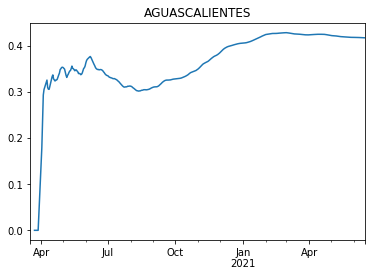

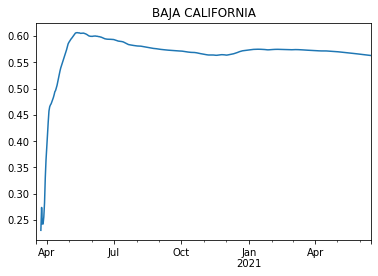

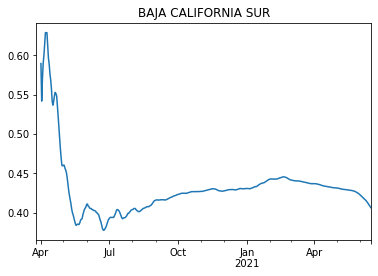

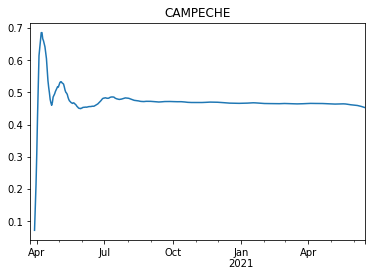

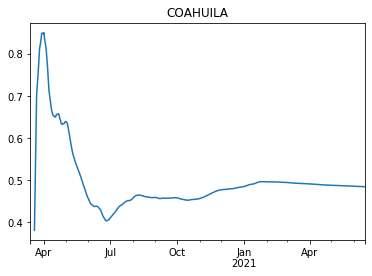

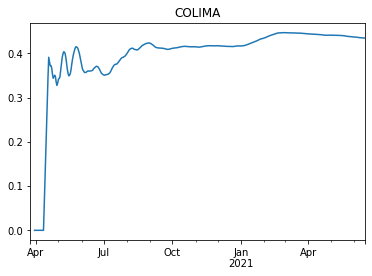

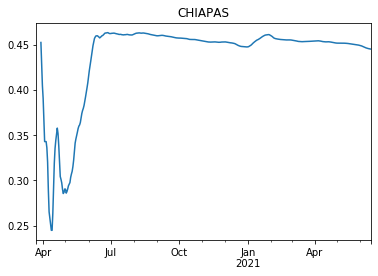

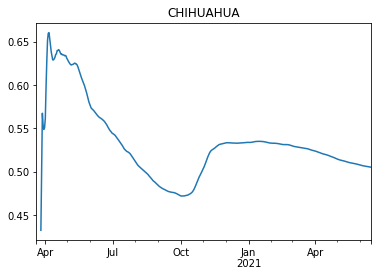

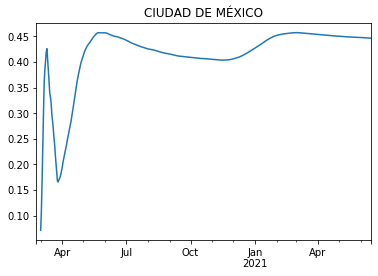

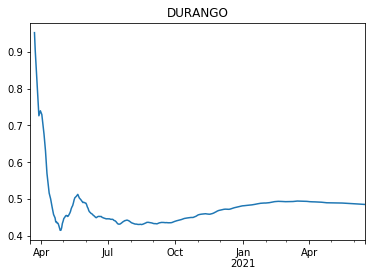

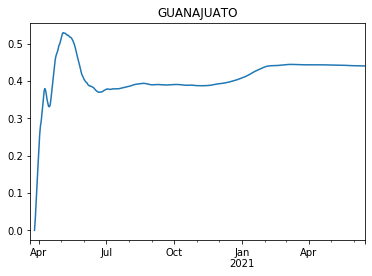

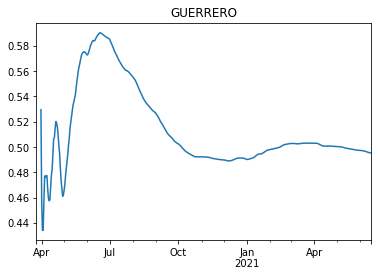

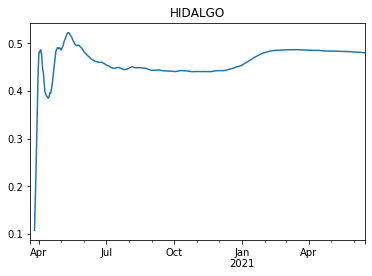

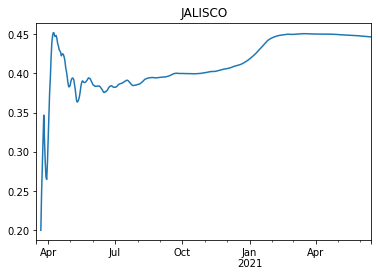

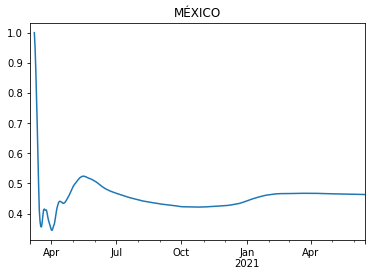

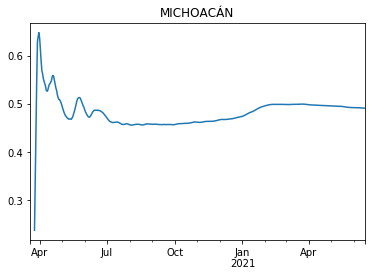

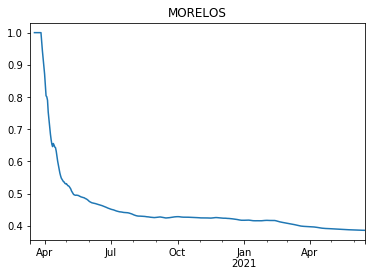

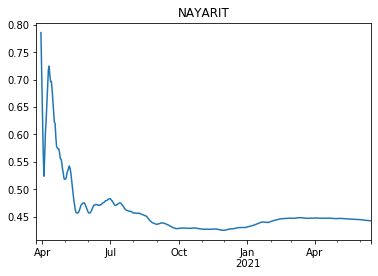

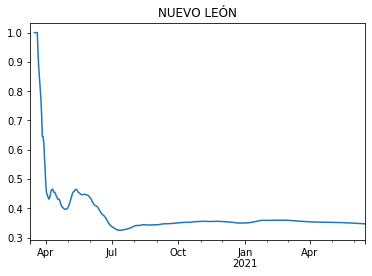

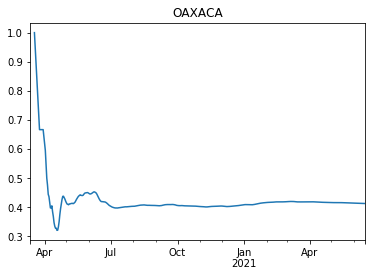

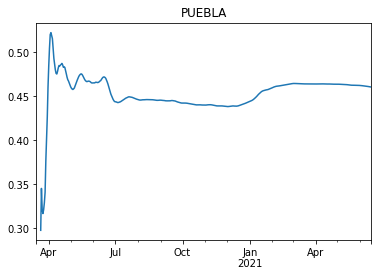

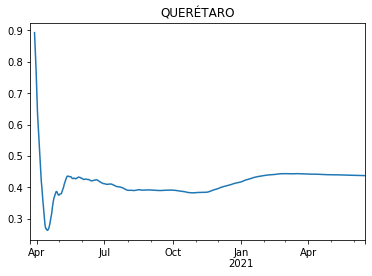

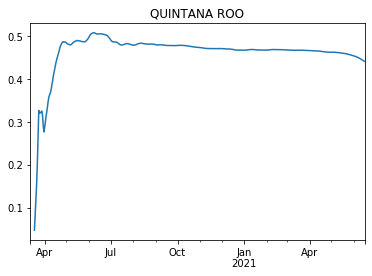

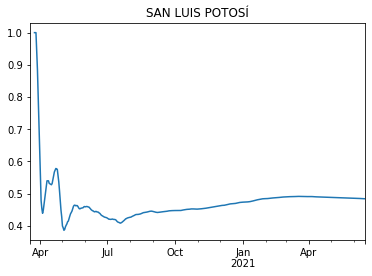

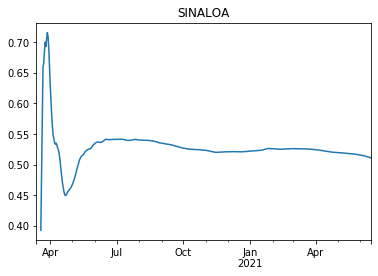

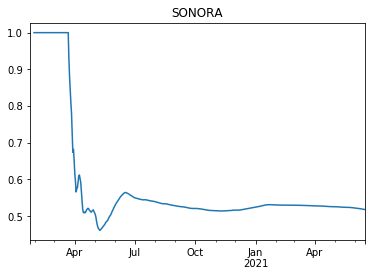

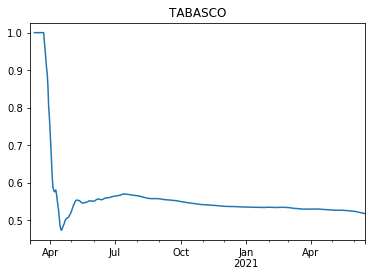

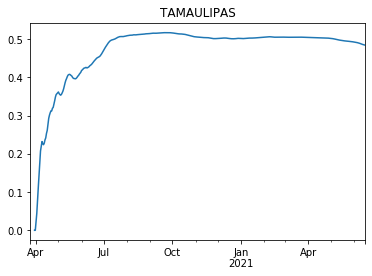

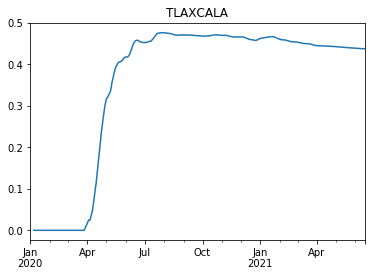

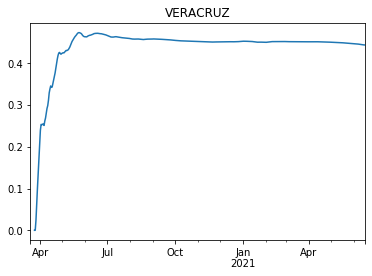

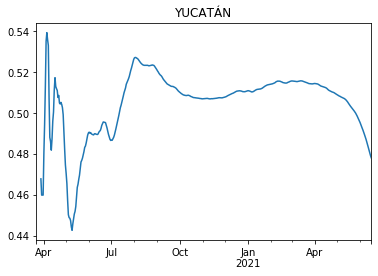

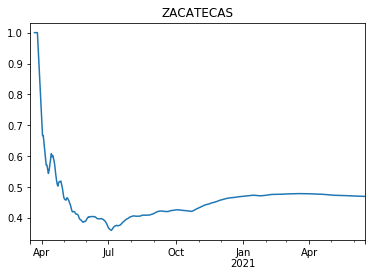

['Moderada',
 'Moderada',
 'Moderada',
 'Adecuada',
 'Adecuada',
 'Moderada',
 'Adecuada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Adecuada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Adecuada',
 'Adecuada',
 'Moderada',
 'Moderada',
 'Adecuada',
 'Moderada']

In [35]:
for i in range(len(poblacion)):
    base_i = base_hospi[base_hospi['ENTIDAD_UM']==i+1]
    hospi_tot = base_i.pivot_table(index='FECHA_INGRESO',aggfunc='size')
    idx = pd.date_range(hospi_tot.index[0],hoy)
    hospi_tot = hospi_tot.reindex(idx, fill_value=0).cumsum()
    hospi_def = base_i[base_i['FECHA_DEF'].notna()].pivot_table(index='FECHA_INGRESO',aggfunc='size')
    hospi_def = hospi_def.reindex(idx, fill_value=0).cumsum()
    cc_performance = hospi_def/hospi_tot
    cc_performance = cc_performance.interpolate()
    #print(hospi_def[-1],hospi_tot[-1],cc_performance[-1])
    cc_performance = cc_performance.rolling(7).mean()
    #print(cc_performance[-1])
    cc_performance.plot()
    plt.title(edos[i+1])
    plt.show()
    cc_performance_states.append(ctr_cc_performance(cc_performance))

cc_performance_states

# PUBLIC HEALTH RESPONSE CAPACITY

### PRUEBAS LAB

In [36]:
base_lab = base_pruebas[base_pruebas['RESULTADO_ANTIGENO']==97]
pruebas_lab = base_lab.pivot_table(index='FECHA_INGRESO',aggfunc='size')
idx = pd.date_range(pruebas_lab.index[0],hoy)
pruebas_lab = pruebas_lab.reindex(idx, fill_value=0)

### PRUEBAS ANTIGENO

In [37]:
base_antigeno = base[base['RESULTADO_ANTIGENO']!=97]
base_antigeno = base_antigeno[base_antigeno['RESULTADO_LAB']==97]
base_antigeno['FECHA_INGRESO'] = pd.to_datetime(base_antigeno['FECHA_INGRESO'])

pruebas_antigeno = base_antigeno.pivot_table(index='FECHA_INGRESO',aggfunc='size')
idx = pd.date_range(pruebas_lab.index[0],hoy)
pruebas_antigeno = pruebas_antigeno.reindex(idx, fill_value=0)

### TOTAL DE PRUEBAS (LAB Y ANTIGENO)

In [38]:
tested = (pruebas_lab + pruebas_antigeno).rolling(7).sum()*1000/pob_nac
response_capacity_nac = (tested[-1] + tested[-8])/2
response_capacity = [response_capacity_nac]
print(response_capacity)
ctr_response_capacity(response_capacity[0])

[0.5506574529819954]


'Limitada'

In [39]:
for i in range(len(poblacion)):
    pruebas_lab = base_lab[base_lab['ENTIDAD_UM']==i+1].pivot_table(index='FECHA_INGRESO',aggfunc='size')
    idx = pd.date_range(pruebas_lab.index[0],hoy)
    pruebas_lab = pruebas_lab.reindex(idx, fill_value=0)
    pruebas_antigeno = base_antigeno[base_antigeno['ENTIDAD_UM']==i+1].pivot_table(index='FECHA_INGRESO',aggfunc='size')
    pruebas_antigeno = pruebas_antigeno.reindex(idx, fill_value=0)
    tested = (pruebas_lab + pruebas_antigeno).rolling(7).sum()*1000/poblacion['POBLACION'][i]
    response_capacity_i = (tested[-1] + tested[-8])/2
    response_capacity.append(response_capacity_i)

response_capacity

[0.5506574529819954,
 0.5481720993734305,
 0.5246148250509837,
 3.068695235727758,
 0.7839489916449149,
 0.5632987750916694,
 0.4168804966009828,
 0.11939650909904889,
 0.21129885108534224,
 2.4763268623636323,
 0.2994721767267663,
 0.36003011440501415,
 0.17363612152094487,
 0.16792852122494062,
 0.18936038129570687,
 0.23814512928655057,
 0.1168073699233783,
 0.3416830767339825,
 0.311587147030185,
 0.552006600639437,
 0.15965668394453575,
 0.15643026460381887,
 0.2656531781245033,
 1.2866601578889183,
 0.6404029700274485,
 0.4055528717222445,
 0.47994442748734356,
 2.2723932814310857,
 0.7205745536069696,
 0.22155058699120947,
 0.2200306810288561,
 1.391872399775889,
 0.19661742049342423]

In [40]:
response_capacity_states = [ctr_response_capacity(x) for x in response_capacity]
response_capacity_states

['Limitada',
 'Limitada',
 'Limitada',
 'Adecuada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Adecuada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Moderada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Adecuada',
 'Limitada',
 'Limitada',
 'Limitada',
 'Moderada',
 'Limitada']

# CLINICAL CARE CAPACITY

In [41]:
ocupacion =  pd.read_excel('../BaseOcupacionHospitalaria_210521.xlsx',engine='openpyxl',skiprows=4, index_col=0)
ocupacion = ocupacion.iloc[:,-1]

beds = [ocupacion['Nacional']]
cc_capacity_states = [ctr_cc_capacity(ocupacion['Nacional'])]
cc_capacity_states

for x in list(ocupacion[:32]):
    beds.append(x)
    cc_capacity = ctr_cc_capacity(x)
    cc_capacity_states.append(cc_capacity)
    
    
cc_capacity_states

['Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada',
 'Adecuada']

# TABLAS CON RESULTADOS

In [42]:
final_ct = np.column_stack((ct_hospitalization_states,ct_mortality_states,ct_cases_states)).max(axis=1)
#final_ct = np.column_stack((ct_hospitalization_states,ct_mortality_states,ct_cases_states,ct_testing_states)).max(axis=1)
final_ct

array([3, 3, 2, 3, 3, 1, 3, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 3,
       2, 4, 1, 2, 3, 3, 3, 2, 2, 4, 2])

In [43]:
community_transmission = pd.DataFrame({'ENTIDAD':edos,
              'TASA DE HOSPITALIZACION': [f'CT {l}: {str(x)[:5]}' for l,x in zip(ct_hospitalization_states, hospitalization)],
             'MORTALIDAD':[f'CT {l}: {str(x)[:5]}' for l,x in zip(ct_mortality_states, mortality)],
             'INCIDENCIA DE CASOS':[f'CT {l}: {str(x)[:5]}' for l,x in zip(ct_cases_states, case_incidence)],
             'PRUEBAS':[f'CT {l}: {str(x)[:5]}' for l,x in zip(ct_testing_states, testing)],
             'CT FINAL': [f'CT {x}' for x in final_ct]})

#community_transmission.to_csv('transmission_level.csv',index=False)
community_transmission

,ENTIDAD,TASA DE HOSPITALIZACION,MORTALIDAD,INCIDENCIA DE CASOS,PRUEBAS,CT FINAL
0,NACIONAL,CT 1: 1.216,CT 1: 0.812,CT 3: 54.14,CT 3: 0.188,CT 3
1,AGUASCALIENTES,CT 1: 0.761,CT 1: 0.968,CT 3: 64.53,CT 3: 0.077,CT 3
2,BAJA CALIFORNIA,CT 1: 0.965,CT 1: 0.536,CT 2: 35.74,CT 3: 0.141,CT 2
3,BAJA CALIFORNIA SUR,CT 2: 7.794,CT 2: 1.369,CT 3: 91.26,CT 4: 0.443,CT 3
4,CAMPECHE,CT 1: 3.222,CT 2: 1.953,CT 3: 130.2,CT 4: 0.231,CT 3
5,COAHUILA,CT 1: 0.558,CT 1: 0.243,CT 1: 16.26,CT 3: 0.108,CT 1
6,COLIMA,CT 1: 1.476,CT 1: 0.890,CT 3: 59.36,CT 4: 0.246,CT 3
7,CHIAPAS,CT 1: 0.239,CT 1: 0.014,CT 1: 0.960,CT 2: 0.041,CT 1
8,CHIHUAHUA,CT 1: 1.194,CT 1: 0.806,CT 3: 53.78,CT 3: 0.170,CT 3
9,CIUDAD DE MÉXICO,CT 1: 1.642,CT 2: 1.273,CT 3: 84.90,CT 3: 0.095,CT 3


In [44]:
def response_capacity_level(a,m,l):
    if a==3:
        return  'Adecuada'
    elif a==2:
        return  'Moderada'
    elif l>=2:
        return  'Limitada'
    elif m==3:
        return 'Moderada'
    elif m==2 and l==1:
        return 'Limitada'
    elif m==2 and a==1:
        return 'Moderada'
    elif m==1 and a==1:
        return 'Limitada'

In [45]:
def response_capacity_level_2(a,m,l):
    if a==2:
        return 'Adecuada'
    if a==1:
        return 'Moderada'
    if m==2:
        return 'Moderada'
    if l==2:
        return 'Limitada'
    if l==1 and m==1:
        return 'Moderada'

In [46]:
response_final = []

response_df = pd.DataFrame({'CLINICAL CARE CAPACITY':[x[0] for x in cc_capacity_states],
             'CLINICAL CARE PERFORMANCE':[x[0] for x in cc_performance_states],})
             #'PUBLIC HEALTH RESPONSE CAPACITY':[x[0] for x in response_capacity_states]})

for i in range(len(response_df)):
    algo_l = list(response_df.values[i])
    algo_s = ''.join(algo_l)
    a_count = algo_s.count('A')
    m_count = algo_s.count('M')
    l_count = algo_s.count('L')
    #r = response_capacity_level(a_count,m_count,l_count)
    r = response_capacity_level_2(a_count,m_count,l_count)                       
    response_final.append(r)
    
response_final

['Moderada',
 'Moderada',
 'Moderada',
 'Adecuada',
 'Adecuada',
 'Moderada',
 'Adecuada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Adecuada',
 'Moderada',
 'Moderada',
 'Moderada',
 'Adecuada',
 'Adecuada',
 'Moderada',
 'Moderada',
 'Adecuada',
 'Moderada']

In [47]:
ctr = pd.DataFrame({'ENTIDAD':edos,
              'CAPACIDAD DE ATENCION CLINICA': [f'{l}: {str(x)}' for l,x in zip(cc_capacity_states, beds)],
             'DESEMPEÑO DE LA ATENCION CLINICA':cc_performance_states,
             'CAPACIDAD DE RESPUESTA DE SALUD PUBLICA':[f'{l}: {str(x)[:5]}' for l,x in zip(response_capacity_states, response_capacity)],
             'CAPACIDAD DE RESPUESTA FINAL':response_final })
#ctr.to_csv('response_capacity.csv',index=False)
ctr

,ENTIDAD,CAPACIDAD DE ATENCION CLINICA,DESEMPEÑO DE LA ATENCION CLINICA,CAPACIDAD DE RESPUESTA DE SALUD PUBLICA,CAPACIDAD DE RESPUESTA FINAL
0,NACIONAL,Adecuada: 0.11,Moderada,Limitada: 0.550,Moderada
1,AGUASCALIENTES,Adecuada: 0.08,Moderada,Limitada: 0.548,Moderada
2,BAJA CALIFORNIA,Adecuada: 0.15,Moderada,Limitada: 0.524,Moderada
3,BAJA CALIFORNIA SUR,Adecuada: 0.17,Adecuada,Adecuada: 3.068,Adecuada
4,CAMPECHE,Adecuada: 0.02,Adecuada,Limitada: 0.783,Adecuada
5,COAHUILA,Adecuada: 0.12,Moderada,Limitada: 0.563,Moderada
6,COLIMA,Adecuada: 0.09,Adecuada,Limitada: 0.416,Adecuada
7,CHIAPAS,Adecuada: 0.04,Moderada,Limitada: 0.119,Moderada
8,CHIHUAHUA,Adecuada: 0.11,Moderada,Limitada: 0.211,Moderada
9,CIUDAD DE MÉXICO,Adecuada: 0.19,Moderada,Adecuada: 2.476,Moderada


In [48]:
def nivel_semaforo(ct, response):
    if ct==1:
        if response=='Adecuada':
            return 1
        else:
            return 2
    elif ct==2:
        if response=='Limitada':
            return 3
        else:
            return 2
    elif ct==3:
        if response=='Adecuada':
            return 2
        else:
            return 3
    elif ct==4:
        if response=='Limitada':
            return 4
        else:
            return 3

In [49]:
indicadores = community_transmission.set_index('ENTIDAD').join(ctr.set_index('ENTIDAD')).reset_index()
indicadores['NIVEL SITUACIONAL'] = [nivel_semaforo(x,y) for x,y in zip(final_ct,response_final)]
indicadores.to_excel('Indicadores_OMS.xlsx',index=False)
indicadores

,ENTIDAD,TASA DE HOSPITALIZACION,MORTALIDAD,INCIDENCIA DE CASOS,PRUEBAS,CT FINAL,CAPACIDAD DE ATENCION CLINICA,DESEMPEÑO DE LA ATENCION CLINICA,CAPACIDAD DE RESPUESTA DE SALUD PUBLICA,CAPACIDAD DE RESPUESTA FINAL,NIVEL SITUACIONAL
0,NACIONAL,CT 1: 1.216,CT 1: 0.812,CT 3: 54.14,CT 3: 0.188,CT 3,Adecuada: 0.11,Moderada,Limitada: 0.550,Moderada,3
1,AGUASCALIENTES,CT 1: 0.761,CT 1: 0.968,CT 3: 64.53,CT 3: 0.077,CT 3,Adecuada: 0.08,Moderada,Limitada: 0.548,Moderada,3
2,BAJA CALIFORNIA,CT 1: 0.965,CT 1: 0.536,CT 2: 35.74,CT 3: 0.141,CT 2,Adecuada: 0.15,Moderada,Limitada: 0.524,Moderada,2
3,BAJA CALIFORNIA SUR,CT 2: 7.794,CT 2: 1.369,CT 3: 91.26,CT 4: 0.443,CT 3,Adecuada: 0.17,Adecuada,Adecuada: 3.068,Adecuada,2
4,CAMPECHE,CT 1: 3.222,CT 2: 1.953,CT 3: 130.2,CT 4: 0.231,CT 3,Adecuada: 0.02,Adecuada,Limitada: 0.783,Adecuada,2
5,COAHUILA,CT 1: 0.558,CT 1: 0.243,CT 1: 16.26,CT 3: 0.108,CT 1,Adecuada: 0.12,Moderada,Limitada: 0.563,Moderada,2
6,COLIMA,CT 1: 1.476,CT 1: 0.890,CT 3: 59.36,CT 4: 0.246,CT 3,Adecuada: 0.09,Adecuada,Limitada: 0.416,Adecuada,2
7,CHIAPAS,CT 1: 0.239,CT 1: 0.014,CT 1: 0.960,CT 2: 0.041,CT 1,Adecuada: 0.04,Moderada,Limitada: 0.119,Moderada,2
8,CHIHUAHUA,CT 1: 1.194,CT 1: 0.806,CT 3: 53.78,CT 3: 0.170,CT 3,Adecuada: 0.11,Moderada,Limitada: 0.211,Moderada,3
9,CIUDAD DE MÉXICO,CT 1: 1.642,CT 2: 1.273,CT 3: 84.90,CT 3: 0.095,CT 3,Adecuada: 0.19,Moderada,Adecuada: 2.476,Moderada,3
